# Photosynthetical parameters

This notebook needs to be launched with the conda environment MITgcmutils2.

The following commands will automatically download the .yml file for the environment MITgcmutils2 from Anaconda Cloud (https://anaconda.org/maximebenoitgagne/environments) and create the environment:

`
conda env create maximebenoitgagne/MITgcmutils2
conda activate MITgcmutils2
jupyter notebook
`

## Load libraries

In [1]:
import sys
sys.path.insert(0,'../../utils/python/python')
from datetime import datetime
from gudinfo import RunInfo
from IPython.display import Markdown as md
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import netcdf_tools
import numpy as np
import pandas as pd

## Configure plots

In [2]:
# adapted from
# https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
# answer of Pedro M Duarte
VERY_SMALL_SIZE=12
SMALL_SIZE = 25
MEDIUM_SIZE = 30
BIGGER_SIZE = 56

# plt.rc('font', size=MEDIUM_SIZE)       # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('lines', markersize=VERY_SMALL_SIZE) # fontsize of the markers
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the x tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the y tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Select year

In [3]:
years=range(1,11)
nbyears=len(years)
first_year=np.arange(0,365)
last_year=np.arange(365*(nbyears-1)+0,365*(nbyears-1)+365)
array1d_iT1y_iT=last_year
first_year366=np.arange(0,366) # first year for heatmaps

# Grid

drF is the r cell face separation, meaning the thickness of each depth layer (in m)

it corresponds to delR on https://mitgcm.readthedocs.io/en/latest/getting_started/getting_started.html#grid

In [4]:
gridfile='grid.t001.nc';
drF=netcdf_tools.read_netcdf(gridfile,'drF')

RC is the r coordiante of cell center (in m)

In [5]:
RC=netcdf_tools.read_netcdf(gridfile,'RC')

RF is the r coordinate of cell interface (in m)

In [6]:
RF=netcdf_tools.read_netcdf(gridfile,'RF')

## Construct info

In [7]:
info = RunInfo('.')

In [8]:
type_id=np.arange(1,52)

pos_Prochlorococcus=np.arange( 0, 1)
pos_Synechococcus  =np.arange( 1, 2)
pos_smalleuk       =np.arange( 2, 4)
pos_cocco          =np.arange( 4, 9)
pos_diazo          =np.arange( 9,13)
pos_Trichodesmium  =np.arange(13,14)
pos_diatoms        =np.arange(14,23)
pos_mixodino       =np.arange(23,33)
pos_zoo            =np.arange(33,49)

# Forcings

## Forcings: ice

In [9]:
ice=np.fromfile('../../gud_1d_35+16/input_noradtrans/input/siarea.qik.2016.365.32bits.bin',
                dtype='>f')

## Maximum photosynthesis rate at saturation irradiance in nutrient replete conditions ($\mu_{max}*\gamma^T$, $d^{-1}$)

### Maximum photosynthesis rate at saturation irradiance in nutrient replete conditions: in model

#### Maximum photosynthesis rate at saturation irradiance in nutrient replete conditions: values in the model from calculation

The maximum photosynthesis rate at saturation irradiance in nutrient replete conditions ($d^{-1}$) is

$\mu_{max}(j)*\gamma^T(T)$

where

$\mu_{max}(j)$ is the maximum growth rate for phytoplankton j ($d^{-1}$)

$\gamma^T(T)$ is the modification of growth by temperature for temperature T (unitless, between 0 and 1)

We will calculate the maximum photosynthesis rate at saturation irradiance in nutrient replete conditions for the numerical type diatom $7 \mu m\ (j=15)$. We will calculate it for the interval of temperature in the forcing field.

**Under-calculation 1**

$\mu_{max}(j)=a_{V_{{max}_{DIC}}}(igroup)V(j)^{b_{V_{{max}_{DIC}}}(igroup)}$

where

$a_{V_{{max}_{DIC}}}(igroup)$ is an allometric parameter for $\mu_{max}$ for group igroup.

V is the volume of plankton j (in $\mu m$).

$b_{V_{{max}_{DIC}}}(igroup)$ is an allometric parameter for $\mu_{max}$ for group igroup.

In [10]:
nplk=info.nplk
mu_max_d=np.empty(nplk)
mu_max_d[:]=np.nan
a_vmax_dic_s=info.params['a_vmax_dic'] # in s^-1
a_vmax_dic_d=a_vmax_dic_s*info.params['a_vmax_dic_denom'] # in d^-1
vol=info.f['vol'] # in um^3
b_vmax_dic=info.params['b_vmax_dic'] # unitless
for iplk in range(0,nplk):
    grp=info.f['grp'][iplk]
    if (0<=grp and grp<8):
        mu_max_d[iplk]=a_vmax_dic_d[grp]*vol[iplk]**b_vmax_dic[grp]

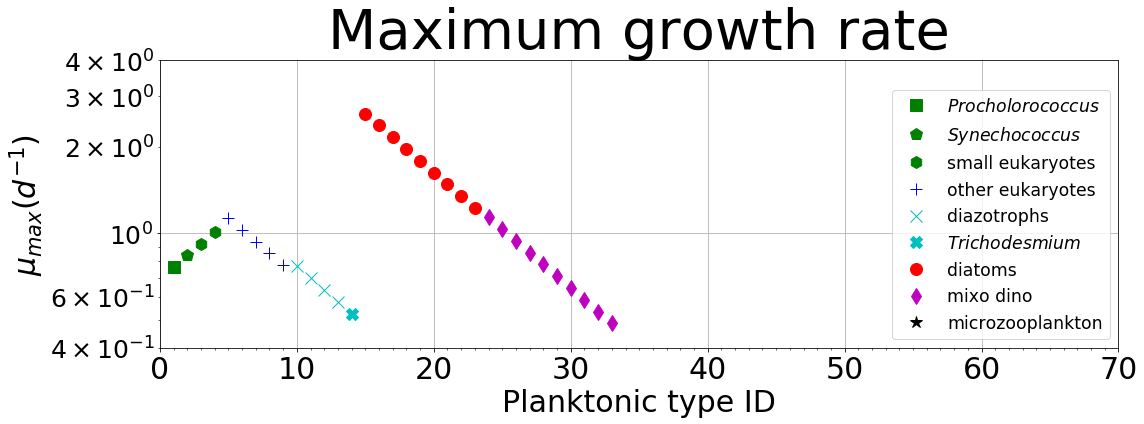

In [11]:
fig,ax=plt.subplots(figsize=(16, 6))
h1=ax.plot(type_id[pos_Prochlorococcus],mu_max_d[pos_Prochlorococcus],'gs', markersize=12)
h2=ax.plot(type_id[pos_Synechococcus],  mu_max_d[pos_Synechococcus],  'gp')
h3=ax.plot(type_id[pos_smalleuk],       mu_max_d[pos_smalleuk],       'gh')
h4=ax.plot(type_id[pos_cocco],          mu_max_d[pos_cocco],          'b+')
h5=ax.plot(type_id[pos_diazo],          mu_max_d[pos_diazo],          'cx')
h6=ax.plot(type_id[pos_Trichodesmium],  mu_max_d[pos_Trichodesmium],  'cX')
h7=ax.plot(type_id[pos_diatoms],        mu_max_d[pos_diatoms],        'ro')
h8=ax.plot(type_id[pos_mixodino],       mu_max_d[pos_mixodino],       'md')
h9=ax.plot(type_id[pos_zoo],            mu_max_d[pos_zoo],            'k*')

ax.set_yscale('log')
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator( 1))
ax.grid()
ax.set_xlim([0,70])
ax.set_ylim([0.4,4])
ax.set_title('Maximum growth rate')
ax.set_xlabel('Planktonic type ID')
ax.set_ylabel('$\mu_{max} (d^{-1}$)')
ax.legend([h1[0],h2[0],h3[0],h4[0],h5[0],h6[0],h7[0],h8[0],h9[0]],
           ['$Procholorococcus$',
            '$Synechococcus$',
            'small eukaryotes',
            'other eukaryotes',
            'diazotrophs',
            '$Trichodesmium$',
            'diatoms',
            'mixo dino',
            'microzooplankton'
           ],
          loc=4,
          fontsize='xx-large'
         )
plt.tight_layout()

In [12]:
md(
'''So, the maximum growth rate for the numerical diatom
$6.6\  um\  (j=15)$ is $\mu_{max}(j=15)= %f\ d^{-1}.$'''
    %(mu_max_d[15-1])
)

So, the maximum growth rate for the numerical diatom
$6.6\  um\  (j=15)$ is $\mu_{max}(j=15)= 2.611107\ d^{-1}.$

**End of under-calculation 1**

**Under-calculation 2**

The modification of growth rate by temperature (unitless, between 0 and 1) is

$\gamma^T=\tau_T e^{A_T(\frac{1}{T+273.15}-\frac{1}{T_N})}$

where

$\tau_T$ is the normalization factor for temperature function $=0.8$ (unitless)

$A_T$ is a coefficient $=-4000\ K$

$T$ is the ambient temperature ($K$)

$T_N$ is the reference temperature
$=20^{\circ}C+273.15^{\circ}C=293.15\ K$

In [13]:
tavefile='tave.0000000000.t001.nc'
array2d_idepth_iT_Ttavefull=netcdf_tools.read_netcdf(tavefile,'Ttave').squeeze().transpose()
array2d_idepth_iT_Ttavefull[-1,:]=np.nan
array2d_idepth_iT_Ttave=array2d_idepth_iT_Ttavefull[:,array1d_iT1y_iT]
minT=np.nanmin(array2d_idepth_iT_Ttave)
maxT=np.nanmax(array2d_idepth_iT_Ttave)

In [14]:
md(
'''The minimum ambient temperature in the forcings is
$%f ^{\circ} C.$'''
    %(minT)
)

The minimum ambient temperature in the forcings is
$-1.755564 ^{\circ} C.$

In [15]:
md(
'''The maximum ambient temperature in the forcings is
$%f ^{\circ} C.$'''
    %(maxT)
)

The maximum ambient temperature in the forcings is
$2.919083 ^{\circ} C.$

In [16]:
md(
'''The interval of temperature ($^{\circ} C$)
in the forcings is
$[%f,%f].$'''
    %(minT,maxT)
)

The interval of temperature ($^{\circ} C$)
in the forcings is
$[-1.755564,2.919083].$

In [17]:
tau_T=0.8 # unitless
A_T=-4000 # K
T_N=20+273.15 # K

mingammaT=tau_T*math.exp(A_T*(1/(minT+273.15)-1/T_N))
maxgammaT=tau_T*math.exp(A_T*(1/(maxT+273.15)-1/T_N))

In [18]:
md(
'''The interval of $\gamma^T$ ($unitless$)
in the simulation is
$[%f,%f].$'''
    %(mingammaT,maxgammaT)
)

The interval of $\gamma^T$ ($unitless$)
in the simulation is
$[0.267952,0.343909].$

**End of under-calculation 2**

$\mu_{max}(j)*\gamma^T(T)=$

In [19]:
minmumaxgammaT=mu_max_d[15-1]*mingammaT
maxmumaxgammaT=mu_max_d[15-1]*maxgammaT

In [20]:
md(
'''The interval of $\mu_{max}(j)*\gamma^T(T)$ in $d^{-1}$
from calculation is
$[%f,%f].$'''
    %(minmumaxgammaT,maxmumaxgammaT)
)

The interval of $\mu_{max}(j)*\gamma^T(T)$ in $d^{-1}$
from calculation is
$[0.699651,0.897982].$

#### Maximum photosynthesis rate at saturation irradiance in nutrient replete conditions: values in the model from the simulation

We will retrieve the maximum photosynthesis rate at saturation irradiance in nutrient replete conditions for the numerical type diatom $7 \mu m\ (j=15)$.

In [21]:
tavefile='pcmrep.0000000000.t001.nc'
array2d_idepth_iT_PCmrep15full=netcdf_tools.read_netcdf(tavefile,'PCmrep15').squeeze().transpose()
array2d_idepth_iT_PCmrep15full[-1,:]=np.nan
array2d_idepth_iT_PCmrep15=array2d_idepth_iT_PCmrep15full[:,array1d_iT1y_iT]
minmodPCrep15=np.nanmin(array2d_idepth_iT_PCmrep15)
maxmodPCrep15=np.nanmax(array2d_idepth_iT_PCmrep15)

In [22]:
md(
'''The interval of $\mu_{max}(j)*\gamma^T(T)$ in $d^{-1}$
from simulation is
$[%f,%f].$'''
    %(minmodPCrep15,maxmodPCrep15)
)

The interval of $\mu_{max}(j)*\gamma^T(T)$ in $d^{-1}$
from simulation is
$[0.699653,0.898092].$

### Maximum photosynthesis rate at saturation irradiance in nutrient replete conditions: comparison between model and literature

In [23]:
obsphotofile='../../obs/lacour17.csv'
obsphoto_df=pd.read_csv(obsphotofile)
obsPCmax_df=obsphoto_df[obsphoto_df.parameter=='PCmax']

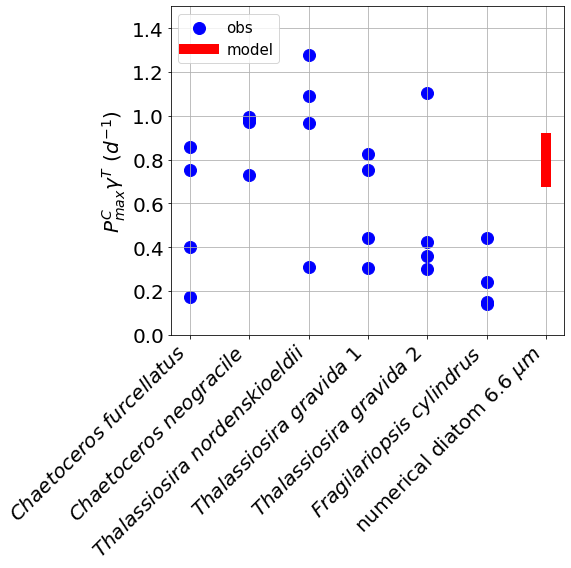

In [24]:
fig=plt.figure(figsize=(8,8))
ax = plt.gca()
ylim=(0,1.5)
h1=ax.scatter(obsPCmax_df.species,obsPCmax_df.value,color='b')
h2=plt.axvline('',
            ymin=minmodPCrep15/ylim[1],
            ymax=maxmodPCrep15/ylim[1],
            color='red',
            lw=10)
# in italics
ax.set_xticklabels(['$Chaetoceros\ furcellatus$',
                    '$Chaetoceros\ neogracile$',
                    '$Thalassiosira\ nordenskioeldii$',
                    '$Thalassiosira\ gravida$ 1',
                    '$Thalassiosira\ gravida$ 2',
                    '$Fragilariopsis\ cylindrus$',
                    'numerical diatom $6.6\ \mu m$'
                   ])
ax.tick_params(labelsize=20)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
ax.set_ylim(ylim)
ax.set_ylabel('$P^C_{max} \gamma^T\ (d^{-1})$',fontsize=20)
ax.legend([h1,h2],['obs','model'],loc='upper left',fontsize=15)
ax.grid()
plt.tight_layout()
plt.savefig('validation/lacour17.comp.PCmax.png')

Figure. Maximum photosynthesis rate at saturation irradiance in nutrient replete conditions ($d^{-1}$). It is $P^C_{max}$ in Lacour et al. (2017), Fig. 8a. It is $\mu_{max}(j)*\gamma^T(T)$ in the model code.

## Linear initial slope of the Chl *a*-specific photosynthesis versus irradiance curve ($\alpha^*, mmol\ C\ (mg\ Chl\ a)^{-1}\ (\mu mol\ photons\ m^{-2})^{-1}$)

### Linear initial slope of the Chl *a*-specific photosynthesis versus irradiance curve: in model

In [25]:
# https://stackoverflow.com/questions/54405704/check-if-all-values-in-dataframe-column-are-the-same
def is_unique(s):
    a = s.to_numpy() # s.values (pandas<0.24)
    return (a[0] == a).all()

In [26]:
alphachl_series=info.f['alphachl'][0:33]
if is_unique(alphachl_series):
    alphachl=alphachl_series[0]

In [27]:
md(
r'''From gud_traits.txt, $\alpha^* = %.0G
\ mmol\ C\ (mg\ Chl\ a)^{-1}\ (\mu mol\ photons\ m^{-2})^{-1}$.'''
    %(alphachl)
)

From gud_traits.txt, $\alpha^* = 8E-07
\ mmol\ C\ (mg\ Chl\ a)^{-1}\ (\mu mol\ photons\ m^{-2})^{-1}$.

We convert the units to compare with literature.

In [28]:
modalphachl_modunits=alphachl # mmol C (mg Chl a)^-1 (umol photons m^-2)^-1
mmolC2molC=1E-3               # mol C (mmol C )^-1
molarmassC=12.011             # g C (mol C)^-1
mgChla2gChla=1E3              # mg Chl a (g Chl a)^-1
s2h=3600                      # sh^-1

In [29]:
modalphachl=modalphachl_modunits*mmolC2molC*molarmassC*mgChla2gChla*s2h

In [30]:
md(
r'''$\alpha^* = %.3G
\ g\ C\ (g\ Chl\ a)^{-1}\ h^{-1}\ (\mu mol\ photons\ m^{-2}\ s^{-1})^{-1}$.'''
    %(modalphachl)
)

$\alpha^* = 0.0346
\ g\ C\ (g\ Chl\ a)^{-1}\ h^{-1}\ (\mu mol\ photons\ m^{-2}\ s^{-1})^{-1}$.

### Linear initial slope of the Chl *a*-specific photosynthesis versus irradiance curve: comparison between model and literature

In [31]:
obsalphachl_df=obsphoto_df[obsphoto_df.parameter=='alphastar']
modelalphachl_df=pd.DataFrame([['alphastar',
                                'numerical diatom 6.6 um',
                                np.nan,
                                modalphachl,
                                'g\ C\ (g\ Chl\ a)^{-1}\ h^{-1}\ (\mu mol\ photons\ m^{-2}\ s^{-1})^{-1}']],
                              columns=obsalphachl_df.columns)
obsalphachl_df=pd.concat([obsalphachl_df,modelalphachl_df],axis=0)

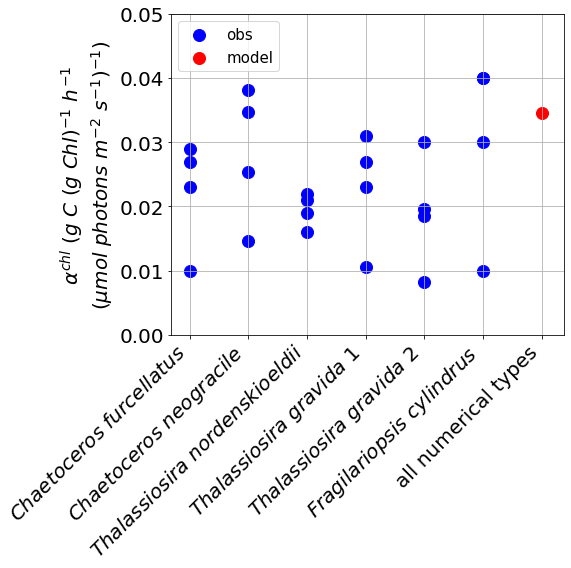

In [32]:
fig=plt.figure(figsize=(8,8))
ax = plt.gca()
ylim=(0,0.05)
h1=ax.scatter(obsalphachl_df.species[0:-1],
              obsalphachl_df.value[0:-1],
              c='b',
              label='obs')
h2=ax.scatter(obsalphachl_df.species.iloc[-1],
              obsalphachl_df.value.iloc[-1],
              c='r',
              label='model')
# in italics
ax.set_xticklabels(['$Chaetoceros\ furcellatus$',
                    '$Chaetoceros\ neogracile$',
                    '$Thalassiosira\ nordenskioeldii$',
                    '$Thalassiosira\ gravida$ 1',
                    '$Thalassiosira\ gravida$ 2',
                    '$Fragilariopsis\ cylindrus$',
                    'all numerical types'
                   ])
ax.tick_params(labelsize=20)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
ax.set_ylim(ylim)
ax.set_ylabel('$\\alpha^{chl}\ (g\ C\ (g\ Chl)^{-1}\ h^{-1}$\n$(\mu mol\ photons\ m^{-2}\ s^{-1})^{-1})$',fontsize=20)
ax.legend(loc='upper left',fontsize=15)
ax.grid()
plt.tight_layout()
plt.savefig('validation/lacour17.comp.alphachl.png')

Figure. Linear initial slope of the Chl *a*-specific photosynthesis versus irradiance curve in nutrient replete conditions ($g\ C\ (g\ Chl\ a)^{-1}\ h^{-1}\ (\mu mol\ photons\ m^{-2}\ s^{-1})^{-1}$). It is $\alpha^*$ in Lacour et al. (2017), Fig. 8c. It is $alphachl$ in the model code.

# Light saturation parameter ($E_k, \mu mol\ photons\ m^{-2}\ s^{-1}$)

## Light saturation parameter from simulation

Chlorophyll *a* for numerical diatom $7 \mu m$ ($mg\ Chl\ a\ m^{-3}$).

In [33]:
chlfile='chl.0000000000.t001.nc';

array2d_idepth_iT_diatom7umchlfull\
=netcdf_tools.read_netcdf(chlfile, 'TRAC84').squeeze().transpose()
array2d_idepth_iT_diatom7umchlfull[-1,:]=np.nan

array2d_idepth_iT_diatom7umchl=array2d_idepth_iT_diatom7umchlfull[:,array1d_iT1y_iT]

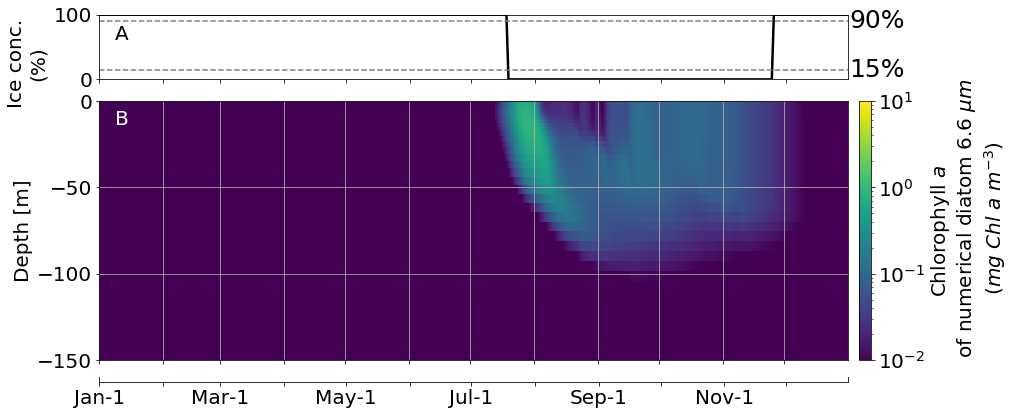

In [34]:
with plt.style.context('validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                  181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    RF_above151=RF[RF>-151]

    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Ice conc.\n(%)')
    ax.yaxis.set_label_coords(-0.068,0.25)
    ax.set_ylim(0,100)
    ax.plot(xlims,[15,15],'k--',color='gray')
    ax.plot(xlims,[90,90],'k--',color='gray')
    ax.text(xlims[1]+.5,15,'15%',verticalalignment='center',fontsize=25)
    ax.text(xlims[1]+.5,90,'90%',verticalalignment='center',fontsize=25)
    plt.text(0.03,0.7,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- CHLOROPHYLL A
    ax=axs[1]
    h=ax.pcolormesh(first_year366,
                    RF_above151,
                    array2d_idepth_iT_diatom7umchl[0:(RF_above151.size)-1,:],
                    cmap='viridis',
                    norm=mpl.colors.LogNorm(vmin=1E-2,vmax=1E1)
                   )
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Depth [m]')
    ax.set_ylim(-150,0)
    # adding the colorbar
    cbaxes = fig.add_axes([0.78, 0.15, 0.01, 0.60])
    cb = plt.colorbar(h,
                      cax = cbaxes)
    cb.set_label('''Chlorophyll $a$
    of numerical diatom $6.6\ \mu m$
    $(mg\ Chl\ a\ m^{-3})$''')
    ax.grid()
    plt.text(0.03,0.93,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20, color='white')

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.80  ,0.65,.15])
    axs[1].set_position( [0.12,0.15  ,0.65,.60])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])
    plt.savefig('chl.0000000000.t001.lastfrom10.logchl15.png')

Figure. (A) Ice concentration ($\%$). (B) 
Chl-*a* concentration ($mg\ Chl\ a\ m^{-3}$) for numerical diatom $7 \mu m$ of the tenth year of simulation at the Green Edge ice camp site ($67.4797 ^\circ N, -63.7895 ^\circ E$) in 2016.

Biomass for numerical diatom $7 \mu m$ ($mmol\ C\ m^{-3}$).

In [35]:
carfile='car.0000000000.t001.nc';

array2d_idepth_iT_diatom7umbiofull\
=netcdf_tools.read_netcdf(carfile, 'TRAC35').squeeze().transpose()
array2d_idepth_iT_diatom7umbiofull[-1,:]=np.nan

array2d_idepth_iT_diatom7umbio=array2d_idepth_iT_diatom7umbiofull[:,array1d_iT1y_iT]

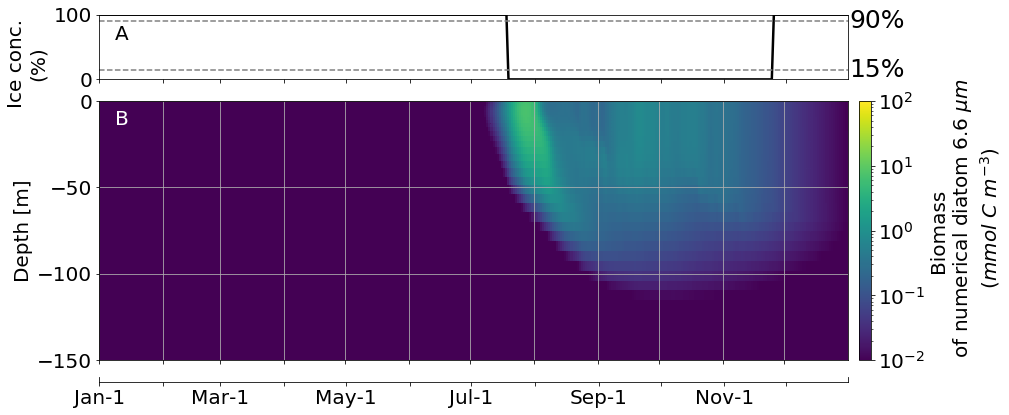

In [36]:
with plt.style.context('validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                  181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    RF_above151=RF[RF>-151]

    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Ice conc.\n(%)')
    ax.yaxis.set_label_coords(-0.068,0.25)
    ax.set_ylim(0,100)
    ax.plot(xlims,[15,15],'k--',color='gray')
    ax.plot(xlims,[90,90],'k--',color='gray')
    ax.text(xlims[1]+.5,15,'15%',verticalalignment='center',fontsize=25)
    ax.text(xlims[1]+.5,90,'90%',verticalalignment='center',fontsize=25)
    plt.text(0.03,0.7,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- PHYTOPLANKTON
    ax=axs[1]
    h=ax.pcolormesh(first_year366,
                    RF_above151,
                    array2d_idepth_iT_diatom7umbio[0:(RF_above151.size)-1,:],
                    cmap='viridis',
                    norm=mpl.colors.LogNorm(vmin=1E-2,vmax=100))
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Depth [m]')
    ax.set_ylim(-150,0)
    # adding the colorbar
    cbaxes = fig.add_axes([0.78, 0.15, 0.01, 0.60])
    cb = plt.colorbar(h,
                      cax = cbaxes)
    cb.set_label('''Biomass
    of numerical diatom $6.6\ \mu m$
    $(mmol\ C\ m^{-3})$''')
    ax.grid()
    plt.text(0.03,0.93,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20, color='white')

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.80  ,0.65,.15])
    axs[1].set_position( [0.12,0.15  ,0.65,.60])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])
    plt.savefig('car.0000000000.t001.lastfrom10.c15.png')

Figure. (A) Ice concentration ($\%$). (B) Simulated biomass ($mmol\ C\ m^{-3}$) for numerical diatom $7 \mu m$ of the tenth year of simulation at the Green Edge ice camp site ($67.4797 ^\circ N, -63.7895 ^\circ E$) in 2016.

Chl a : C ratio ($mg\ Chl\ a\ (mmol\ C)^{-1}$) for numerical diatom $7 \mu m$.

In [37]:
array2d_idepth_iT_modtheta15=array2d_idepth_iT_diatom7umchl/array2d_idepth_iT_diatom7umbio

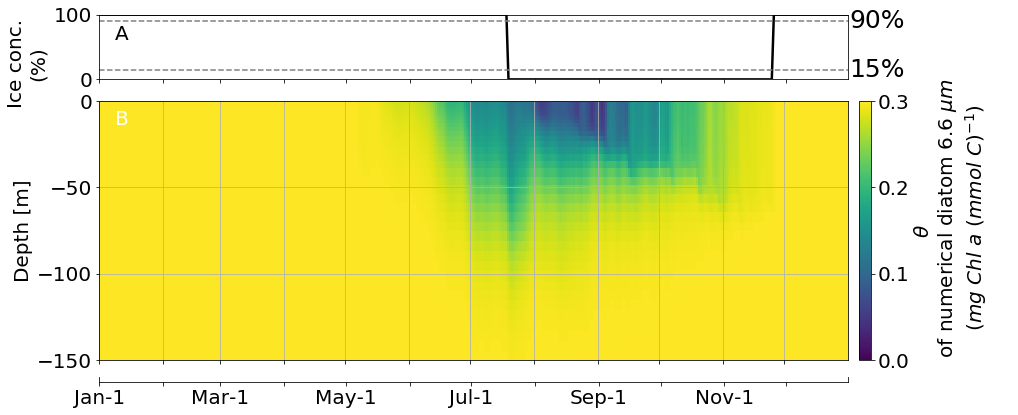

In [38]:
with plt.style.context('validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                  181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    RF_above151=RF[RF>-151]

    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Ice conc.\n(%)')
    ax.yaxis.set_label_coords(-0.068,0.25)
    ax.set_ylim(0,100)
    ax.plot(xlims,[15,15],'k--',color='gray')
    ax.plot(xlims,[90,90],'k--',color='gray')
    ax.text(xlims[1]+.5,15,'15%',verticalalignment='center',fontsize=25)
    ax.text(xlims[1]+.5,90,'90%',verticalalignment='center',fontsize=25)
    plt.text(0.03,0.7,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- PHYTOPLANKTON
    ax=axs[1]
    h=ax.pcolormesh(first_year366,
                    RF_above151,
                    array2d_idepth_iT_modtheta15[0:(RF_above151.size)-1,:],
                    cmap='viridis',
                    vmin=0,
                    vmax=0.3
                   )
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Depth [m]')
    ax.set_ylim(-150,0)
    # adding the colorbar
    cbaxes = fig.add_axes([0.78, 0.15, 0.01, 0.60])
    cb = plt.colorbar(h,
                      cax = cbaxes)
    cb.set_label('''$\\theta$
    of numerical diatom $6.6\ \mu m$
    $(mg\ Chl\ a\ (mmol\ C)^{-1})$
    ''')
    ax.grid()
    plt.text(0.03,0.93,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20, color='white')

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.80  ,0.65,.15])
    axs[1].set_position( [0.12,0.15  ,0.65,.60])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])
    plt.savefig('car.0000000000.t001.lastfrom10.theta15.png')

Figure. (A) Ice concentration ($\%$). (B) 
Simulated ratio of Chl *a* to C ($mg\ Chl\ a\ (mmol\ C)^{-1}$) for numerical diatom $7 \mu m$ of the tenth year of simulation at the Green Edge ice camp site ($67.4797 ^\circ N, -63.7895 ^\circ E$) in 2016.

Potential temperature ($T, ^\circ C$).

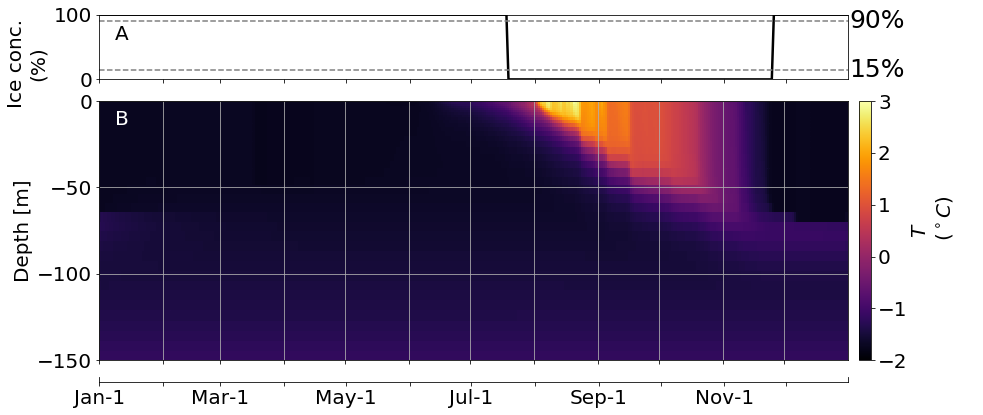

In [39]:
with plt.style.context('validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                  181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    RF_above151=RF[RF>-151]

    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Ice conc.\n(%)')
    ax.yaxis.set_label_coords(-0.068,0.25)
    ax.set_ylim(0,100)
    ax.plot(xlims,[15,15],'k--',color='gray')
    ax.plot(xlims,[90,90],'k--',color='gray')
    ax.text(xlims[1]+.5,15,'15%',verticalalignment='center',fontsize=25)
    ax.text(xlims[1]+.5,90,'90%',verticalalignment='center',fontsize=25)
    plt.text(0.03,0.7,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- TEMPERATURE
    ax=axs[1]
    h=ax.pcolormesh(first_year366,
                    RF_above151,
                    array2d_idepth_iT_Ttave[0:(RF_above151.size)-1,:],
                    cmap='inferno',
                    vmin=-2,
                    vmax=3
                   )
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Depth [m]')
    ax.set_ylim(-150,0)
    # adding the colorbar
    cbaxes = fig.add_axes([0.78, 0.15, 0.01, 0.60])
    cb = plt.colorbar(h,
                      cax = cbaxes)
    cb.set_label('''$T$
    $(^\circ C)$
    ''')
    ax.grid()
    plt.text(0.03,0.93,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20, color='white')

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.80  ,0.65,.15])
    axs[1].set_position( [0.12,0.15  ,0.65,.60])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])
    plt.savefig('tave.0000000000.t001.lastfrom10.Ttave.png')

Maximum photosynthesis rate at saturation irradiance in nutrient replete conditions for numerical diatom $7 \mu m$: values in the model from calculation ($\mu_{max}(j=15)*\gamma^T(T), d^{-1}$).

In [40]:
array2d_idepth_iT_modPCmrep15=mu_max_d[15-1] * tau_T*np.exp(A_T*(1/(array2d_idepth_iT_Ttave+273.15)-1/T_N))

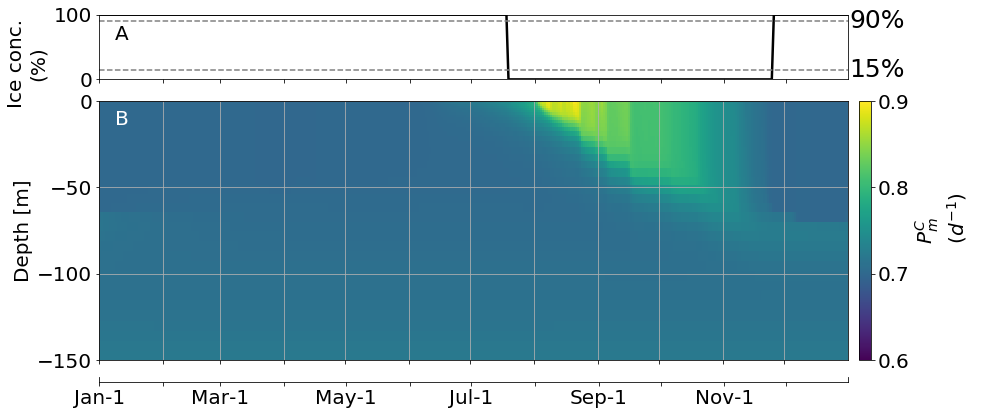

In [41]:
with plt.style.context('validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                  181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    RF_above151=RF[RF>-151]

    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Ice conc.\n(%)')
    ax.yaxis.set_label_coords(-0.068,0.25)
    ax.set_ylim(0,100)
    ax.plot(xlims,[15,15],'k--',color='gray')
    ax.plot(xlims,[90,90],'k--',color='gray')
    ax.text(xlims[1]+.5,15,'15%',verticalalignment='center',fontsize=25)
    ax.text(xlims[1]+.5,90,'90%',verticalalignment='center',fontsize=25)
    plt.text(0.03,0.7,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- MAXIMUM PHOTOSYNTHESIS RATES
    ax=axs[1]
    h=ax.pcolormesh(first_year366,
                    RF_above151,
                    array2d_idepth_iT_modPCmrep15[0:(RF_above151.size)-1,:],
                    cmap='viridis',
                    vmin=0.6,
                    vmax=0.9
                   )
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Depth [m]')
    ax.set_ylim(-150,0)
    # adding the colorbar
    cbaxes = fig.add_axes([0.78, 0.15, 0.01, 0.60])
    cb = plt.colorbar(h,
                      cax = cbaxes)
    cb.set_label('''$P^C_m$
    $(d^{-1})$
    ''')
    ax.grid()
    plt.text(0.03,0.93,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20, color='white')

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.80  ,0.65,.15])
    axs[1].set_position( [0.12,0.15  ,0.65,.60])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])
    plt.savefig('tave.0000000000.t001.lastfrom10.PCmrep15.png')

Light saturation parameter for numerical diatom $7 \mu m$ ($E_k,\ \mu mol\ photons\ m^{-2}\ s^{-1}$).

In [42]:
s2d=86400 # s d^-1

$E_k= \frac{P^C_m}{\alpha^* \cdot \theta \cdot \frac{86400\ s}{d}}$

where

$E_k$: light saturation parameter ($\mu mol\ photons\ m^{-2}\ s^{-1}$).

$P^C_m$: carbon-specific maximum photosynthesis rate ($d^{-1}$).

$alpha^*$: linear initial slope of the Chl *a*-specific photosynthesis versus irradiance curve ($\alpha^*, mmol\ C\ (mg\ Chl\ a)^{-1}\ (\mu mol\ photons\ m^{-2})^{-1}$).

$\theta$: Chl a : C ratio ($mg\ Chl\ a\ (mmol\ C)^{-1}$).

In [43]:
array2d_idepth_iT_modEk15=\
array2d_idepth_iT_modPCmrep15 \
/ (modalphachl_modunits * array2d_idepth_iT_modtheta15 * s2d)

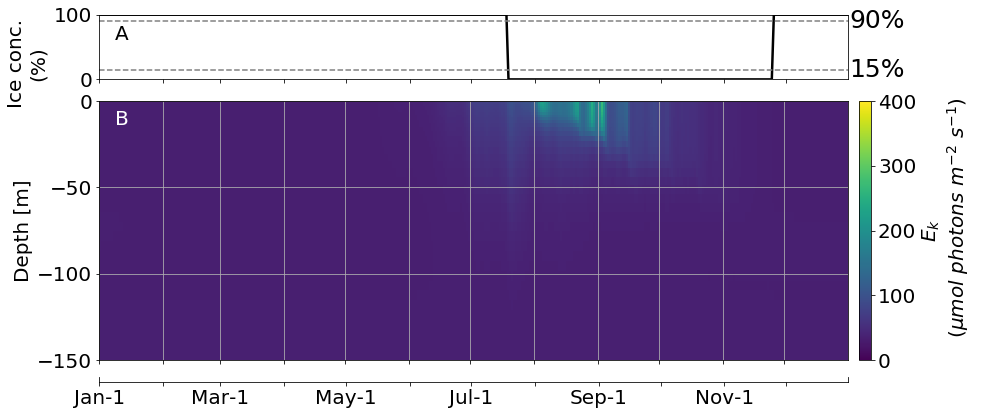

In [44]:
with plt.style.context('validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                  181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    RF_above151=RF[RF>-151]

    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Ice conc.\n(%)')
    ax.yaxis.set_label_coords(-0.068,0.25)
    ax.set_ylim(0,100)
    ax.plot(xlims,[15,15],'k--',color='gray')
    ax.plot(xlims,[90,90],'k--',color='gray')
    ax.text(xlims[1]+.5,15,'15%',verticalalignment='center',fontsize=25)
    ax.text(xlims[1]+.5,90,'90%',verticalalignment='center',fontsize=25)
    plt.text(0.03,0.7,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- LIGHT SATURATION PARAMETERS
    ax=axs[1]
    h=ax.pcolormesh(first_year366,
                    RF_above151,
                    array2d_idepth_iT_modEk15[0:(RF_above151.size)-1,:],
                    cmap='viridis',
                    vmin=0,
                    vmax=400
                   )
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Depth [m]')
    ax.set_ylim(-150,0)
    # adding the colorbar
    cbaxes = fig.add_axes([0.78, 0.15, 0.01, 0.60])
    cb = plt.colorbar(h,
                      cax = cbaxes)
    cb.set_label('''$E_k$
    $(\mu mol\ photons\ m^{-2}\ s^{-1})$
    ''')
    ax.grid()
    plt.text(0.03,0.93,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20, color='white')

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.80  ,0.65,.15])
    axs[1].set_position( [0.12,0.15  ,0.65,.60])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])
    plt.savefig('car.0000000000.t001.lastfrom10.Ek15.png')

## Light saturation parameter from simulation when there is light

mean PAR ($\mu mol\ photons\ m^{-2}\ s^{-1}$).

In [45]:
array2d_idepth_iT_PARfullumolEonm2s=netcdf_tools.read_netcdf(carfile, 'PAR').squeeze().transpose()
if np.all(array2d_idepth_iT_PARfullumolEonm2s==0):
    #define GUD_PARUICE
    array2d_idepth_iT_PAR_icefullumolEonm2s=netcdf_tools.read_netcdf(carfile, 'PAR_ice').squeeze().transpose()
    array2d_idepth_iT_PAR_owfullumolEonm2s=netcdf_tools.read_netcdf(carfile, 'PAR_ow').squeeze().transpose()
    (ndepths,ndays)=array2d_idepth_iT_PAR_icefullumolEonm2s.shape
    array2d_idepth_iT_icefull=np.tile(ice,(ndepths,nbyears))
    array2d_idepth_iT_meanPARfull=array2d_idepth_iT_PAR_owfullumolEonm2s*(1-array2d_idepth_iT_icefull)\
    +array2d_idepth_iT_PAR_icefullumolEonm2s*array2d_idepth_iT_icefull
array2d_idepth_iT_meanPAR=array2d_idepth_iT_meanPARfull[:,array1d_iT1y_iT]

In [46]:
array2d_idepth_iT_PAR_owfullumolEonm2s.shape

(75, 3650)

In [47]:
array2d_idepth_iT_icefull.shape

(75, 3650)

In [48]:
marray2d_idepth_iT_meanPAR=array2d_idepth_iT_meanPAR.copy()
marray2d_idepth_iT_meanPAR[marray2d_idepth_iT_meanPAR<=0]=np.finfo(float).eps

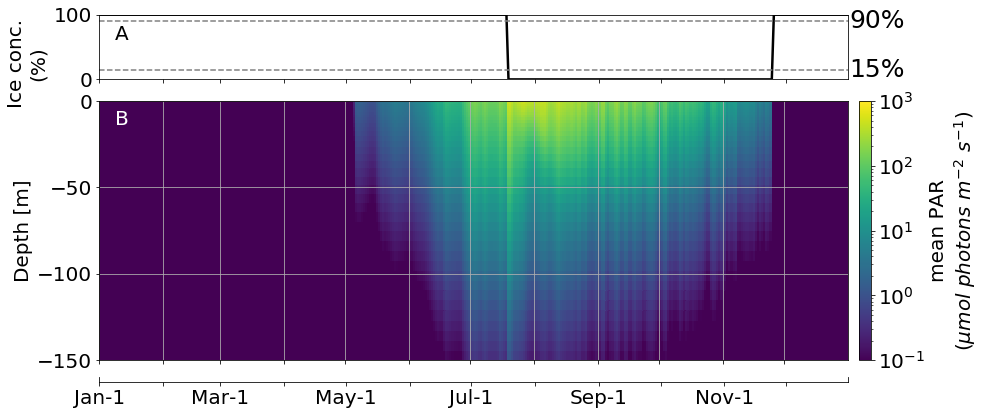

In [49]:
with plt.style.context('validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                  181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    RF_above151=RF[RF>-151]

    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Ice conc.\n(%)')
    ax.yaxis.set_label_coords(-0.068,0.25)
    ax.set_ylim(0,100)
    ax.plot(xlims,[15,15],'k--',color='gray')
    ax.plot(xlims,[90,90],'k--',color='gray')
    ax.text(xlims[1]+.5,15,'15%',verticalalignment='center',fontsize=25)
    ax.text(xlims[1]+.5,90,'90%',verticalalignment='center',fontsize=25)
    plt.text(0.03,0.7,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- MEAN PAR
    ax=axs[1]
    h=ax.pcolormesh(first_year366,
                    RF_above151,
                    marray2d_idepth_iT_meanPAR[0:(RF_above151.size)-1,:],
                    cmap='viridis',
                    norm=mpl.colors.LogNorm(vmin=1E-1,vmax=1E3)
                   )
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Depth [m]')
    ax.set_ylim(-150,0)
    # adding the colorbar
    cbaxes = fig.add_axes([0.78, 0.15, 0.01, 0.60])
    cb = plt.colorbar(h,
                      cax = cbaxes)
    cb.set_label('''mean PAR\n($\mu mol\ photons\ m^{-2}\ s^{-1}$)''')
    ax.grid()
    plt.text(0.03,0.93,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20, color='white')

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.80  ,0.65,.15])
    axs[1].set_position( [0.12,0.15  ,0.65,.60])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])

In [50]:
array2d_idepth_iT_modEk15light=array2d_idepth_iT_modEk15.copy()
array2d_idepth_iT_modEk15light[array2d_idepth_iT_meanPAR<5]=np.nan

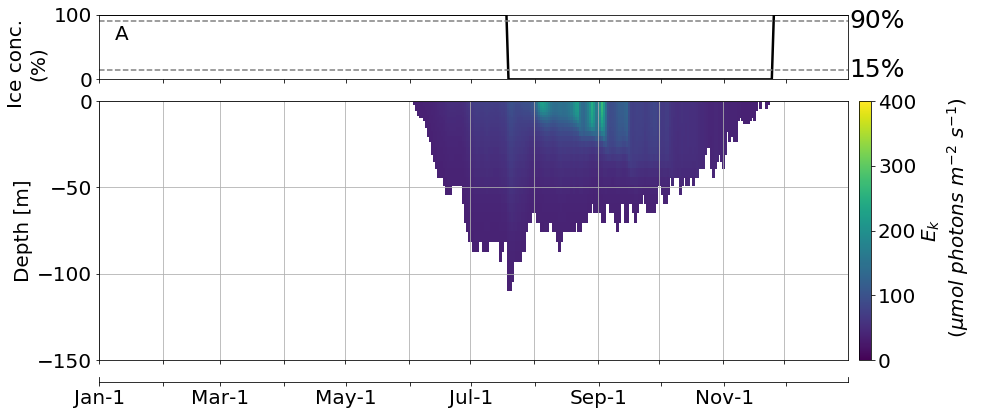

In [51]:
with plt.style.context('validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                  181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    RF_above151=RF[RF>-151]

    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Ice conc.\n(%)')
    ax.yaxis.set_label_coords(-0.068,0.25)
    ax.set_ylim(0,100)
    ax.plot(xlims,[15,15],'k--',color='gray')
    ax.plot(xlims,[90,90],'k--',color='gray')
    ax.text(xlims[1]+.5,15,'15%',verticalalignment='center',fontsize=25)
    ax.text(xlims[1]+.5,90,'90%',verticalalignment='center',fontsize=25)
    plt.text(0.03,0.7,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- LIGHT SATURATION PARAMETERS
    ax=axs[1]
    h=ax.pcolormesh(first_year366,
                    RF_above151,
                    array2d_idepth_iT_modEk15light[0:(RF_above151.size)-1,:],
                    cmap='viridis',
                    vmin=0,
                    vmax=400
                   )
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Depth [m]')
    ax.set_ylim(-150,0)
    # adding the colorbar
    cbaxes = fig.add_axes([0.78, 0.15, 0.01, 0.60])
    cb = plt.colorbar(h,
                      cax = cbaxes)
    cb.set_label('''$E_k$
    $(\mu mol\ photons\ m^{-2}\ s^{-1})$
    ''')
    ax.grid()
    plt.text(0.03,0.93,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20, color='white')

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.80  ,0.65,.15])
    axs[1].set_position( [0.12,0.15  ,0.65,.60])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])
    plt.savefig('car.0000000000.t001.lastfrom10.Ek15light.png')

## Light saturation parameter: comparison between model and literature

In [52]:
obsEk_df=obsphoto_df[obsphoto_df.parameter=='Ek']

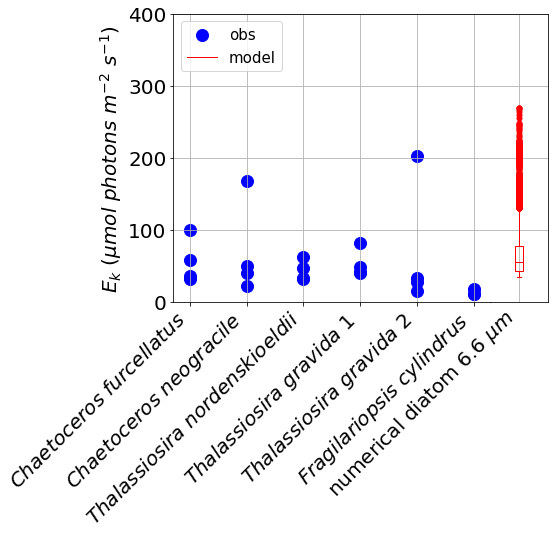

In [53]:
fig,axs=plt.subplots(1,2,sharey=True,figsize=(8,8))

# --- OBSERVATIONS
ax_obs=axs[0]
h_obs=ax_obs.scatter(obsEk_df.species[0:-1],
                     obsEk_df.value[0:-1],
                     c='b',
                     label='obs')
ax_obs.set_ylim(0,400)
# in italics
ax_obs.set_xticklabels(['$Chaetoceros\ furcellatus$',
                        '$Chaetoceros\ neogracile$',
                        '$Thalassiosira\ nordenskioeldii$',
                        '$Thalassiosira\ gravida$ 1',
                        '$Thalassiosira\ gravida$ 2',
                        '$Fragilariopsis\ cylindrus$',
                        'all numerical types'
                       ])
ax_obs.tick_params(labelsize=20)
plt.setp(ax_obs.get_xticklabels(), ha="right", rotation=45)
ax_obs.set_ylabel('$E_k\ (\mu mol\ photons\ m^{-2}\ s^{-1})$',
                  fontsize=20)
ax_obs.grid()

# --- MODEL
ax_mod=axs[1]
# numerical diatom 6.6 um (calculation)
numcalc=array2d_idepth_iT_modEk15light.flatten()
numcalc=numcalc[~np.isnan(numcalc)]
h_mod=ax_mod.boxplot(numcalc,
                     boxprops=dict(color='red'),
                     flierprops=dict(marker='o',
                                     markerfacecolor='red',
                                     markeredgecolor='none'),
                     medianprops=dict(color='red'),
                     capprops=dict(color='red'),
                     whiskerprops=dict(color='red')
                    )
ax_mod.set_xticklabels(['numerical diatom $6.6\ \mu m$'])
ax_mod.tick_params(labelsize=20)
plt.setp(ax_mod.get_xticklabels(), ha="right", rotation=45)
ax_mod.spines['left'].set_visible(False)
ax_mod.tick_params(length=0)
ax_mod.grid()

ax_obs.legend([h_obs,h_mod['boxes'][0]],
              ['obs','model'],
              loc='upper left',
              fontsize=15)

# --- POSITION
ax_obs.set_position( [0.30,0.45  ,0.55,0.50])
ax_mod.set_position( [0.85,0.45  ,0.10,0.50])

plt.savefig('validation/lacour17.comp.Ek.png')

Figure. Light saturation parameter ($E_k; \mu mol\ photons\ m^{-2}\ s^{-1}$). obs: observations of $E_k$ in Lacour et al. (2017), Fig. 9a. model: distribution of model $E_k$ when PAR is above $5\ \mu mol\ photons\ m^{-2}\ s^{-1}$.

## Light saturation irradiance at 10 m: comparison between model and literature

### Light saturation irradiance at 10 m: model

in $\mu mol\ photons\ m^{-2}\ s^{-1}$.

In [54]:
(ndepths,ndays)=array2d_idepth_iT_modEk15.shape
array1d_iT_modEk15_10m=np.zeros(ndays)
x=10
xp=[RC[8],RC[7]]
assert np.all(np.diff(xp)>0), "xp is in decreasing order: %r %r" % (xp[0],xp[1])
for iT in first_year:
    fp =[array2d_idepth_iT_modEk15[8,iT],array2d_idepth_iT_modEk15[7,iT]]
    modEk15_10m=np.interp(x,xp,fp)
    array1d_iT_modEk15_10m[iT]=modEk15_10m

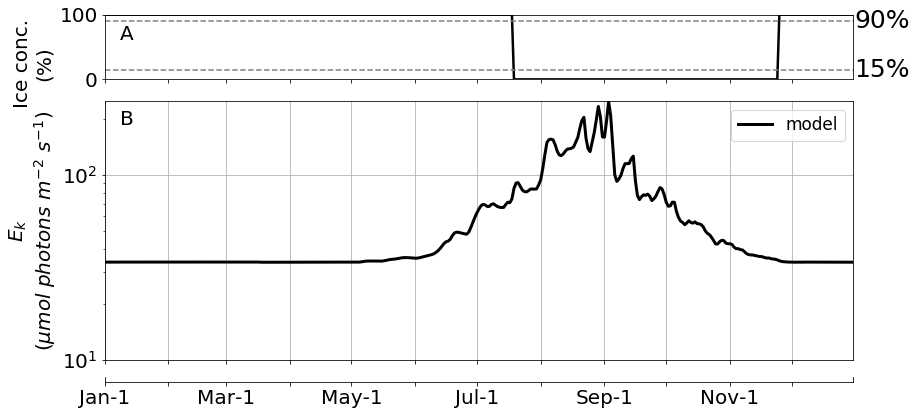

In [55]:
with plt.style.context('validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                  181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    RF_above151=RF[RF>-151]

    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Ice conc.\n(%)',fontsize=20)
    ax.yaxis.set_label_coords(-0.068,0.25)
    ax.set_ylim(0,100)
    ax.plot(xlims,[15,15],'k--',color='gray')
    ax.plot(xlims,[90,90],'k--',color='gray')
    ax.text(xlims[1]+.5,15,'15%',verticalalignment='center',fontsize=25)
    ax.text(xlims[1]+.5,90,'90%',verticalalignment='center',fontsize=25)
    plt.text(0.03,0.7,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- LIGHT SATURATION PARAMETER
    ax=axs[1]
    h2=ax.plot(first_year,
               array1d_iT_modEk15_10m,
               '-',
               lw=3,
               color='black',
               label='model')
    ax.set_yscale('log')
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('$E_k$\n$(\mu mol\ photons\ m^{-2}\ s^{-1})$',
                 fontsize=20)
    ax.set_ylim(10,250)
    ax.legend(loc='upper right')
    ax.grid()
    plt.text(0.03,0.93,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.80  ,0.65,.15])
    axs[1].set_position( [0.12,0.15  ,0.65,.60])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])
    plt.savefig('car.0000000000.t001.lastfrom10.Ek15.10m.png')

### Light saturation irradiance at 10 m: comparison between model and literature

In [56]:
def load_photo():
    fname='../../obs/66419.csv'
    df = pd.read_csv(
        fname,
        dtype={
            'type': 'category',
            'bottom_depth_m':np.float32,
            'date': str,
            'station': np.float32,
            'depth_m': 'category',
            'model_type': 'category',
            'ps': np.float32,
            'alpha': np.float32,
            'beta': np.float32,
            'p0': np.float32,
            'pm': np.float32,
            'ek': np.float32,
            'im': np.float32,
            'ib': np.float32,
            'alpha_b': np.float32,
            'beta_b': np.float32,
            'pb_max': np.float32,
            'rss': np.float32,
            'r2': np.float32,
            'pi': 'category',
            'method': 'category',
            'sample_type': 'category',
            'snow_thickness': 'category',
            'sample_source': 'category',
            'quality_control': 'category',
            'mission': 'category'
        },
        parse_dates=['date']
    )
    df['doy']=df['date'].apply(lambda x:x.timetuple().tm_yday)
#     dfc=df.copy()
#     mask=dfc['depth_m']=='interface'
#     dfc.loc[mask,'depth_m']=0
#     return dfc
    return df

In [57]:
photo_df=load_photo()

In [58]:
ek10_df=photo_df[(photo_df.mission=='ice_camp_2016') \
                & (photo_df.sample_type=='water') \
                 & (photo_df.depth_m=='10')]

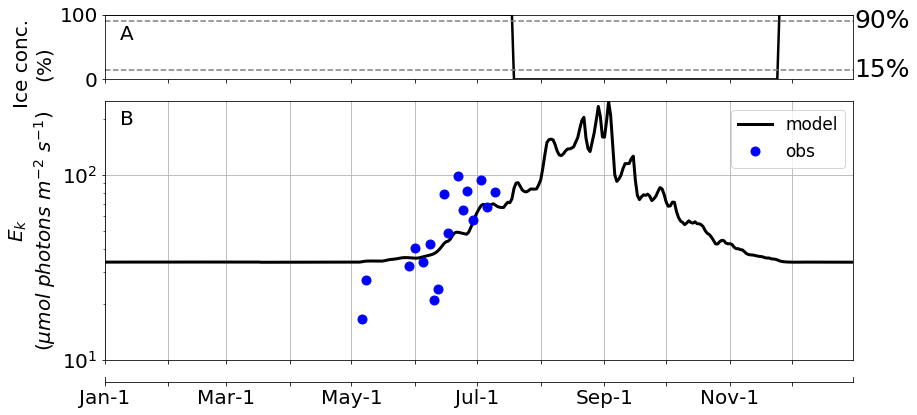

In [59]:
with plt.style.context('validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                  181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    RF_above151=RF[RF>-151]

    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,ice*100,'k-',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Ice conc.\n(%)',fontsize=20)
    ax.yaxis.set_label_coords(-0.068,0.25)
    ax.set_ylim(0,100)
    ax.plot(xlims,[15,15],'k--',color='gray')
    ax.plot(xlims,[90,90],'k--',color='gray')
    ax.text(xlims[1]+.5,15,'15%',verticalalignment='center',fontsize=25)
    ax.text(xlims[1]+.5,90,'90%',verticalalignment='center',fontsize=25)
    plt.text(0.03,0.7,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- LIGHT SATURATION PARAMETER
    ax=axs[1]
    h1=ax.plot(first_year,
               array1d_iT_modEk15_10m,
               '-',
               lw=3,
               color='black',
               label='model')
    h2=ax.plot(ek10_df['doy'],
               ek10_df['ek'],
               'o',
               color='blue',
               label='obs'
    )
    ax.set_yscale('log')
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('$E_k$\n$(\mu mol\ photons\ m^{-2}\ s^{-1})$',
                 fontsize=20)
    ax.set_ylim(10,250)
    ax.legend(loc='upper right')
    ax.grid()
    plt.text(0.03,0.93,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=20)

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.80  ,0.65,.15])
    axs[1].set_position( [0.12,0.15  ,0.65,.60])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])
    plt.savefig('validation/GEic2016.comp.Ek15.10m.png')

Figure. Light saturation parameter ($E_k; \mu mol\ photons\ m^{-2}\ s^{-1}$). obs: observations of $E_k$ at 10 m at the Green Edge ice camp 2016 (Massicotte et al., 2020). model: modelled $E_k$ at 10 m.